# **Library**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# **Dataset Visualization**

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# Load your dataset
file_path = '/content/drive/MyDrive/Defense help/Fahim/Anxiety_Data_Responses.xlsx'
df = pd.read_excel(file_path)

In [118]:
# Print all column names in the dataset
print(df.columns)


Index(['Timestamp', '1.Your Name', '2.Age', '3.Are you a student?', '4.Gender',
       '5.Feeling nervous, anxious or on edge',
       '6.Not being able to stop or control worrying',
       '7.Worrying too much about different things', '8.Trouble relaxing',
       '9.Being so restless that it is hard to sit still',
       '10.Becoming easily annoyed or irritable',
       '11.Feeling afraid as if something awful might happen'],
      dtype='object')


In [119]:
# Print first 5 rows and columns of the dataset
print("First 5 rows and columns of the dataset:")
df.head()

First 5 rows and columns of the dataset:


,Timestamp,1.Your Name,2.Age,3.Are you a student?,4.Gender,"5.Feeling nervous, anxious or on edge",6.Not being able to stop or control worrying,7.Worrying too much about different things,8.Trouble relaxing,9.Being so restless that it is hard to sit still,10.Becoming easily annoyed or irritable,11.Feeling afraid as if something awful might happen
0,2023-12-19 17:30:00,Prapto,23.0,No,Male,Nearly every day,Several days,Several days,Nearly every day,Several days,Not at all,Nearly every day
1,2023-12-19 19:53:00,Sifat,23.0,No,Male,Several days,Several days,Several days,Nearly every day,Several days,Not at all,Nearly every day
2,2023-12-19 20:14:00,Abrar,22.0,Yes,Male,Several days,Several days,Nearly every day,Not at all,Several days,More than half the days,Nearly every day
3,2023-12-19 20:15:00,Nila,23.0,Yes,Female,Not at all,Nearly every day,Nearly every day,Not at all,More than half the days,Nearly every day,More than half the days
4,2023-12-19 20:17:00,Shanjida,28.0,No,Female,More than half the days,More than half the days,Nearly every day,Several days,Several days,More than half the days,Nearly every day


In [120]:
# Print number of attributes and rows for the dataset
num_attributes = len(df.columns)
num_rows = len(df)
print("\nNumber of attributes:", num_attributes)
print("Number of rows:", num_rows)



Number of attributes: 12
Number of rows: 1012


In [121]:
# Print non-null value counts and data types for each attribute in the dataset
print("\nNon-null value counts and data types for each attribute:")
print(df.info())



Non-null value counts and data types for each attribute:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             1012 non-null   object 
 1   1.Your Name                                           1012 non-null   object 
 2   2.Age                                                 1011 non-null   float64
 3   3.Are you a student?                                  1012 non-null   object 
 4   4.Gender                                              1012 non-null   object 
 5   5.Feeling nervous, anxious or on edge                 1012 non-null   object 
 6   6.Not being able to stop or control worrying          1012 non-null   object 
 7   7.Worrying too much about different things            1012 non-null   object 
 8   

In [122]:
# Print the number of non-null values
print("\nNumber of non-null values Tottal In cell:")
print(df.count().sum())


Number of non-null values Tottal In cell:
12143



Number of data in the '2.Age' attribute: 1012


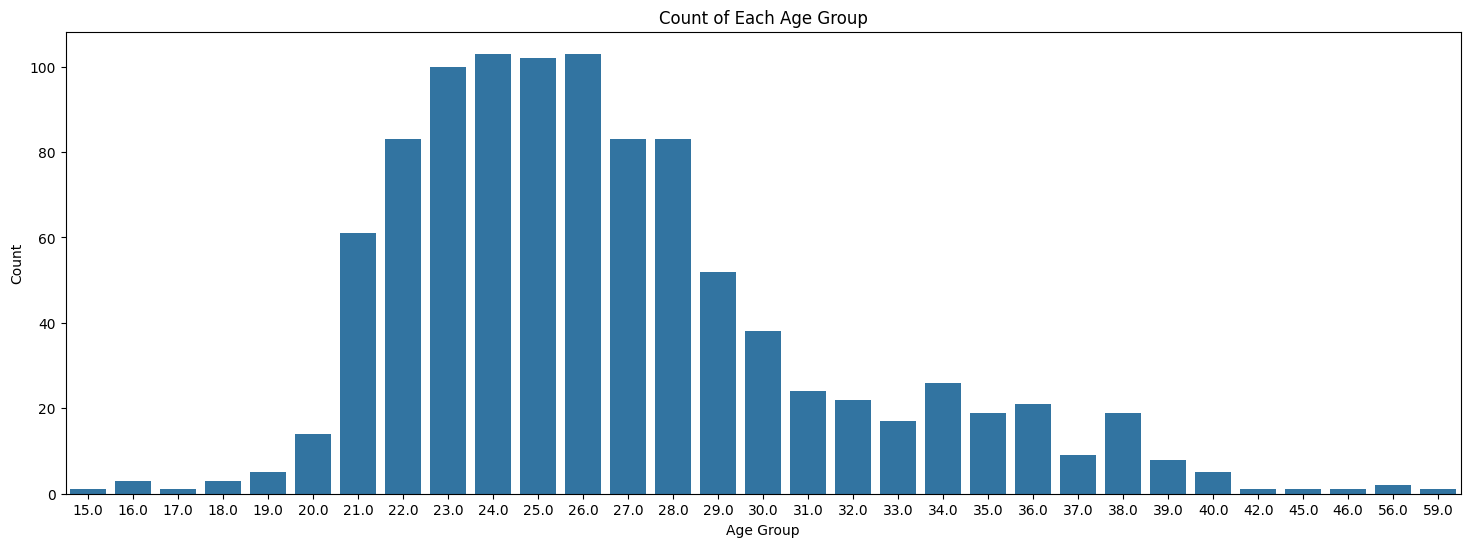

In [123]:
# Print the number of data in the 'What is your age?' attribute
print("\nNumber of data in the '2.Age' attribute:", len(df['2.Age']))

# Plot the count of each age group
plt.figure(figsize=(18, 6))
sns.countplot(x='2.Age', data=df)
plt.title('Count of Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [124]:
# Print the minimum and count of each age group
age_group_counts = df['2.Age'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']
print("\nCount of each age group:")
print(age_group_counts)


Count of each age group:
    Age Group  Count
0        26.0    103
1        24.0    103
2        25.0    102
3        23.0    100
4        22.0     83
5        28.0     83
6        27.0     83
7        21.0     61
8        29.0     52
9        30.0     38
10       34.0     26
11       31.0     24
12       32.0     22
13       36.0     21
14       38.0     19
15       35.0     19
16       33.0     17
17       20.0     14
18       37.0      9
19       39.0      8
20       19.0      5
21       40.0      5
22       16.0      3
23       18.0      3
24       56.0      2
25       46.0      1
26       15.0      1
27       45.0      1
28       17.0      1
29       59.0      1
30       42.0      1


In [125]:
# Print the average, mean, median, and max for the 'What is your age?' attribute
print("\nAverage age:", df['2.Age'].mean())
print("Mean age:", df['2.Age'].mode().iloc[0])  # using mode for mean since the data is categorical
print("Median age:", df['2.Age'].median())
print("Max age:", df['2.Age'].max())
print("Min age:", df['2.Age'].min())
print("Total age:", df['2.Age'].count())
# Calculate percentage distribution
age_percentage = df['2.Age'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each age:")
print(age_percentage)


Average age: 26.72007912957468
Mean age: 24.0
Median age: 26.0
Max age: 59.0
Min age: 15.0
Total age: 1011

Percentage Distribution of Each age:
26.0    10.187933
24.0    10.187933
25.0    10.089021
23.0     9.891197
22.0     8.209693
28.0     8.209693
27.0     8.209693
21.0     6.033630
29.0     5.143422
30.0     3.758655
34.0     2.571711
31.0     2.373887
32.0     2.176063
36.0     2.077151
38.0     1.879327
35.0     1.879327
33.0     1.681503
20.0     1.384768
37.0     0.890208
39.0     0.791296
19.0     0.494560
40.0     0.494560
16.0     0.296736
18.0     0.296736
56.0     0.197824
46.0     0.098912
15.0     0.098912
45.0     0.098912
17.0     0.098912
59.0     0.098912
42.0     0.098912
Name: 2.Age, dtype: float64



Number of data in the '3.Are you a student?' attribute: 1012


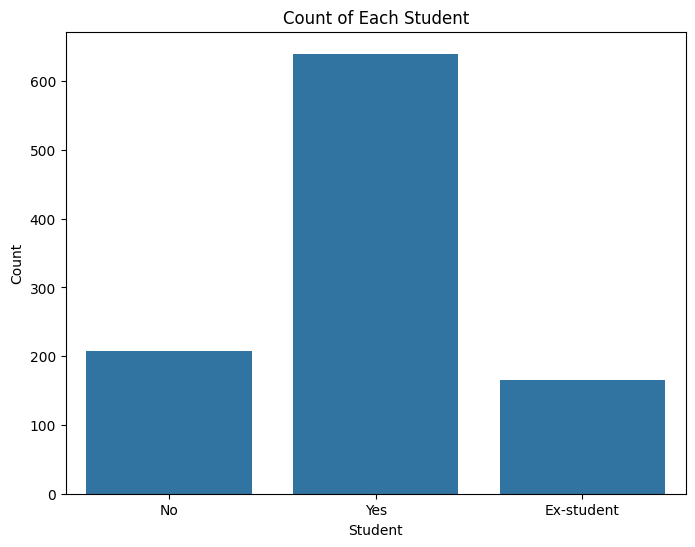

In [126]:
# Print the number of data in the '3.Are you a student?' attribute
print("\nNumber of data in the '3.Are you a student?' attribute:", len(df['3.Are you a student?']))

# Plot the count of each Student
plt.figure(figsize=(8, 6))
sns.countplot(x='3.Are you a student?', data=df)
plt.title('Count of Each Student')
plt.xlabel('Student')
plt.ylabel('Count')
plt.show()

In [127]:
# Print the counts of each Student cat
student_counts = df['3.Are you a student?'].value_counts().reset_index()
student_counts.columns = ['Student Catagory', 'Count']
print("\nCount of each Student Catagory:")
print(student_counts)
# Calculate percentage distribution
student_percentage = df['3.Are you a student?'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Student Catagory:")
print(student_percentage)


Count of each Student Catagory:
  Student Catagory  Count
0              Yes    640
1               No    207
2       Ex-student    165

Percentage Distribution of Student Catagory:
Yes           63.241107
No            20.454545
Ex-student    16.304348
Name: 3.Are you a student?, dtype: float64



Number of data in the '4.Gender' attribute: 1012


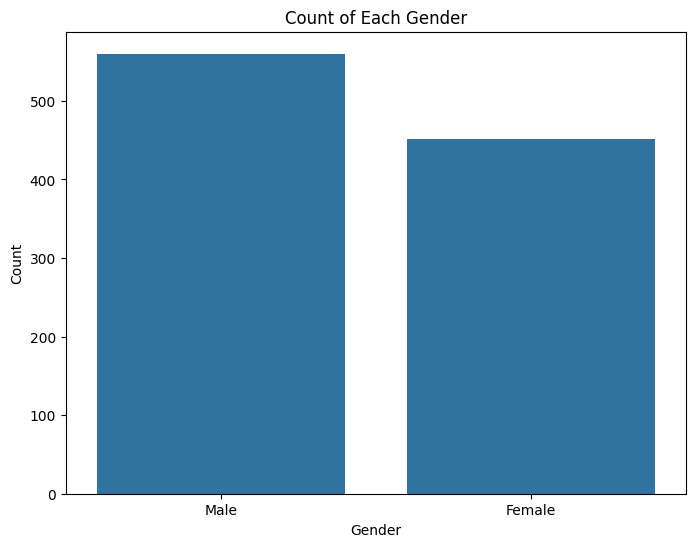

In [128]:
# Print the number of data in the 'What is your gender?' attribute
print("\nNumber of data in the '4.Gender' attribute:", len(df['4.Gender']))

# Plot the count of each gender
plt.figure(figsize=(8, 6))
sns.countplot(x='4.Gender', data=df)
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [129]:
# Print the counts of each gender
gender_counts = df['4.Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
print("\nCount of each gender:")
print(gender_counts)
# Calculate percentage distribution
gender_percentage = df['4.Gender'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Each Gender:")
print(gender_percentage)


Count of each gender:
   Gender  Count
0    Male    560
1  Female    452

Percentage Distribution of Each Gender:
Male      55.335968
Female    44.664032
Name: 4.Gender, dtype: float64


In [130]:
# Print the counts of Column 5
five_counts = df['5.Feeling nervous, anxious or on edge'].value_counts().reset_index()
five_counts.columns = ['Column Five', 'Count']
print("\nCount of each Entry in Column Five:")
print(five_counts)


Count of each Entry in Column Five:
               Column Five  Count
0             Several days    444
1  More than half the days    379
2               Not at all    124
3         Nearly every day     65


In [131]:
# Print the counts of Column 6
six_counts = df['6.Not being able to stop or control worrying'].value_counts().reset_index()
six_counts.columns = ['Column six', 'Count']
print("\nCount of each Entry in Column six:")
print(six_counts)


Count of each Entry in Column six:
                Column six  Count
0  More than half the days    322
1             Several days    319
2               Not at all    209
3         Nearly every day    162


In [132]:
# Print the counts of Column 7
seven_counts = df['7.Worrying too much about different things'].value_counts().reset_index()
seven_counts.columns = ['Column seven', 'Count']
print("\nCount of each Entry in Column sseven:")
print(seven_counts)


Count of each Entry in Column sseven:
              Column seven  Count
0             Several days    349
1  More than half the days    290
2               Not at all    208
3         Nearly every day    165


In [133]:
# Print the counts of Column 8
eight_counts = df['8.Trouble relaxing'].value_counts().reset_index()
eight_counts.columns = ['Column eight', 'Count']
print("\nCount of each Entry in Column eight:")
print(eight_counts)


Count of each Entry in Column eight:
              Column eight  Count
0             Several days    323
1  More than half the days    270
2               Not at all    255
3         Nearly every day    164


In [134]:
# Print the counts of Column 9
nine_counts = df['9.Being so restless that it is hard to sit still'].value_counts().reset_index()
nine_counts.columns = ['Column nine', 'Count']
print("\nCount of each Entry in Column nine:")
print(nine_counts)


Count of each Entry in Column nine:
               Column nine  Count
0             Several days    310
1  More than half the days    275
2               Not at all    272
3         Nearly every day    155


In [135]:
# Print the counts of Column 10
ten_counts = df['10.Becoming easily annoyed or irritable'].value_counts().reset_index()
ten_counts.columns = ['Column ten', 'Count']
print("\nCount of each Entry in Column ten:")
print(ten_counts)


Count of each Entry in Column ten:
                Column ten  Count
0             Several days    363
1  More than half the days    320
2         Nearly every day    176
3               Not at all    153


In [136]:
# Print the counts of Column 11
eleven_counts = df['11.Feeling afraid as if something awful might happen'].value_counts().reset_index()
eleven_counts.columns = ['Column eleven', 'Count']
print("\nCount of each Entry in Column eleven:")
print(eleven_counts)


Count of each Entry in Column eleven:
             Column eleven  Count
0             Several days    399
1  More than half the days    247
2         Nearly every day    191
3               Not at all    175


# **Dataset Pre-Processing**

In [137]:
# Step 1: Calculate GAD-7 total score
df['GAD7_Total_Score'] = df.iloc[:, 5:12].apply(lambda row: row.map({'Not at all': 0, 'Several days': 1, 'More than half the days': 2, 'Nearly every day': 3}).sum(), axis=1)


In [138]:
# Step 2: Perform label encoding for relevant columns (5-11)
label_encode_columns = ['5.Feeling nervous, anxious or on edge',
                        '6.Not being able to stop or control worrying', '7.Worrying too much about different things',
                        '8.Trouble relaxing', '9.Being so restless that it is hard to sit still',
                        '10.Becoming easily annoyed or irritable', '11.Feeling afraid as if something awful might happen']

label_encoder = LabelEncoder()
df[label_encode_columns] = df[label_encode_columns].apply(label_encoder.fit_transform)


In [139]:
# Step 3: Calculate GAD-7 total score
df['GAD7_Total_Score'] = df.iloc[:, 5:12].sum(axis=1)


In [140]:
# Display the updated DataFrame
df.head()

,Timestamp,1.Your Name,2.Age,3.Are you a student?,4.Gender,"5.Feeling nervous, anxious or on edge",6.Not being able to stop or control worrying,7.Worrying too much about different things,8.Trouble relaxing,9.Being so restless that it is hard to sit still,10.Becoming easily annoyed or irritable,11.Feeling afraid as if something awful might happen,GAD7_Total_Score
0,2023-12-19 17:30:00,Prapto,23.0,No,Male,1,3,3,1,3,2,1,14
1,2023-12-19 19:53:00,Sifat,23.0,No,Male,3,3,3,1,3,2,1,16
2,2023-12-19 20:14:00,Abrar,22.0,Yes,Male,3,3,1,2,3,0,1,13
3,2023-12-19 20:15:00,Nila,23.0,Yes,Female,2,1,1,2,0,1,0,7
4,2023-12-19 20:17:00,Shanjida,28.0,No,Female,0,0,1,3,3,0,1,8


In [141]:
# Assuming you have a column named 'GAD7_Total_Score' in your DataFrame
df['Anxiety_Level'] = pd.cut(df['GAD7_Total_Score'],
                             bins=[-1, 4, 9, 14, float('inf')],
                             labels=['Minimal Anxiety', 'Mild Anxiety', 'Moderate Anxiety', 'Severe Anxiety'])

# Print the first few rows of the DataFrame to check the new column
print(df[['GAD7_Total_Score', 'Anxiety_Level']].head())

   GAD7_Total_Score     Anxiety_Level
0                14  Moderate Anxiety
1                16    Severe Anxiety
2                13  Moderate Anxiety
3                 7      Mild Anxiety
4                 8      Mild Anxiety


# **Train And Test**

In [256]:
# Split the dataset into features (X) and target variable (y)
X = df.iloc[:, 5:13]
y = df['Anxiety_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# **Algorithms**

# **Random Forest**

In [257]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=3, max_depth=4)  # Adjust n_estimators and max_depth


rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Print the results for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print("Classification Report:")
print(rf_report)
print("Confusion Matrix:")
print(rf_cm)

Random Forest Results:
Accuracy: 0.9144736842105263
Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       0.81      0.98      0.88        90
 Minimal Anxiety       1.00      0.73      0.84        11
Moderate Anxiety       0.96      0.86      0.91       132
  Severe Anxiety       1.00      0.96      0.98        71

        accuracy                           0.91       304
       macro avg       0.94      0.88      0.90       304
    weighted avg       0.92      0.91      0.92       304

Confusion Matrix:
[[ 88   0   2   0]
 [  3   8   0   0]
 [ 18   0 114   0]
 [  0   0   3  68]]


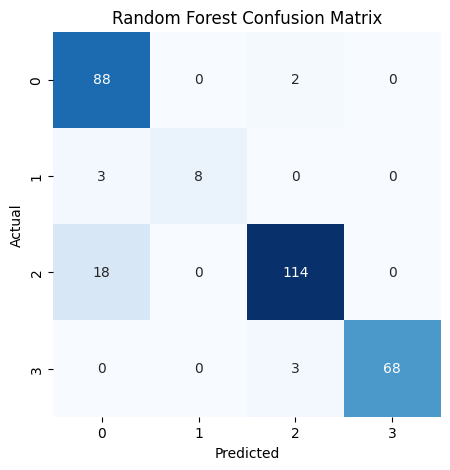

In [258]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Gradient Boosting**

In [261]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42, n_estimators=2,max_depth=3)
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)

# Print the results for Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_report = classification_report(y_test, gb_predictions)
gb_cm = confusion_matrix(y_test, gb_predictions)

print("Gradient Boosting Results:")
print(f"Accuracy: {gb_accuracy}")
print("Classification Report:")
print(gb_report)
print("Confusion Matrix:")
print(gb_cm)


Gradient Boosting Results:
Accuracy: 0.9638157894736842
Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       1.00      1.00      1.00        90
 Minimal Anxiety       0.00      0.00      0.00        11
Moderate Anxiety       0.92      1.00      0.96       132
  Severe Anxiety       1.00      1.00      1.00        71

        accuracy                           0.96       304
       macro avg       0.73      0.75      0.74       304
    weighted avg       0.93      0.96      0.95       304

Confusion Matrix:
[[ 90   0   0   0]
 [  0   0  11   0]
 [  0   0 132   0]
 [  0   0   0  71]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



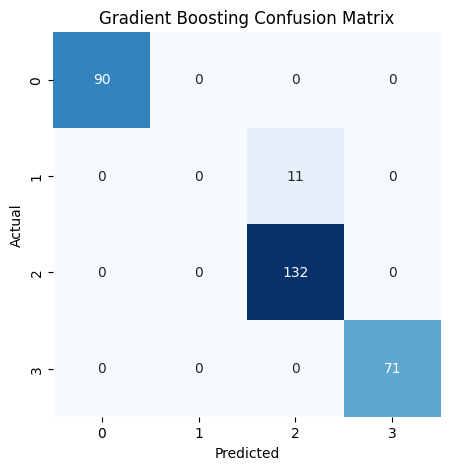

In [262]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **AdaBoost**

In [208]:
# AdaBoost
adaboost = AdaBoostClassifier(random_state=42,n_estimators=2)
adaboost.fit(X_train, y_train)
adaboost_predictions = adaboost.predict(X_test)

# Print the results for AdaBoost
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_report = classification_report(y_test, adaboost_predictions)
adaboost_cm = confusion_matrix(y_test, adaboost_predictions)

print("AdaBoost Results:")
print(f"Accuracy: {adaboost_accuracy}")
print("Classification Report:")
print(adaboost_report)
print("Confusion Matrix:")
print(adaboost_cm)

AdaBoost Results:
Accuracy: 0.9654320987654321
Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       0.90      1.00      0.95       122
 Minimal Anxiety       0.00      0.00      0.00        14
Moderate Anxiety       1.00      1.00      1.00       173
  Severe Anxiety       1.00      1.00      1.00        96

        accuracy                           0.97       405
       macro avg       0.72      0.75      0.74       405
    weighted avg       0.93      0.97      0.95       405

Confusion Matrix:
[[122   0   0   0]
 [ 14   0   0   0]
 [  0   0 173   0]
 [  0   0   0  96]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



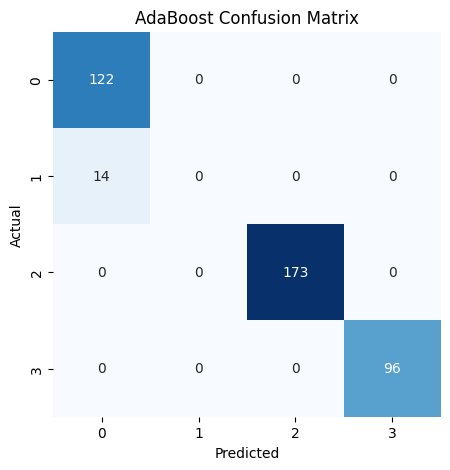

In [209]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(adaboost_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **MLP (Neural Network)**

In [210]:
# MLP (Neural Network)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)

# Print the results for MLP
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_report = classification_report(y_test, mlp_predictions)
mlp_cm = confusion_matrix(y_test, mlp_predictions)

print("MLP (Neural Network) Results:")
print(f"Accuracy: {mlp_accuracy}")
print("Classification Report:")
print(mlp_report)
print("Confusion Matrix:")
print(mlp_cm)

MLP (Neural Network) Results:
Accuracy: 0.8518518518518519
Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       0.90      0.93      0.91       122
 Minimal Anxiety       1.00      0.71      0.83        14
Moderate Anxiety       0.83      0.84      0.84       173
  Severe Anxiety       0.81      0.79      0.80        96

        accuracy                           0.85       405
       macro avg       0.88      0.82      0.85       405
    weighted avg       0.85      0.85      0.85       405

Confusion Matrix:
[[113   0   9   0]
 [  4  10   0   0]
 [  9   0 146  18]
 [  0   0  20  76]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



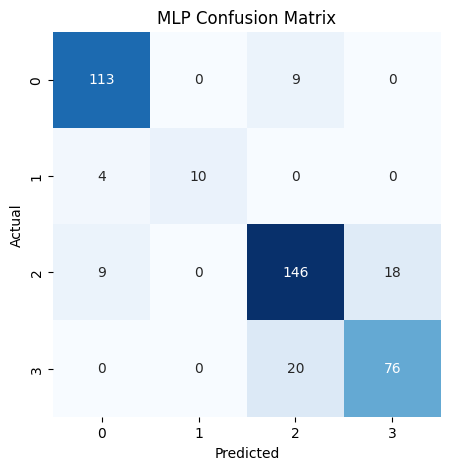

In [211]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('MLP Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **RNN**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Recurrent Neural Networks (RNNs) Results:
Accuracy: 0.8881578947368421
Classification Report:
                  precision    recall  f1-score   support

    Mild Anxiety       0.93      0.93      0.93        90
 Minimal Anxiety       1.00      0.82      0.90        11
Moderate Anxiety       0.86      0.90      0.88       132
  Severe Anxiety       0.87      0.82      0.84        71

        accuracy                           0.89       304
       macro avg       0.92      0.87      0.89       304
    weighted avg       0.89      0.89      0.89       304



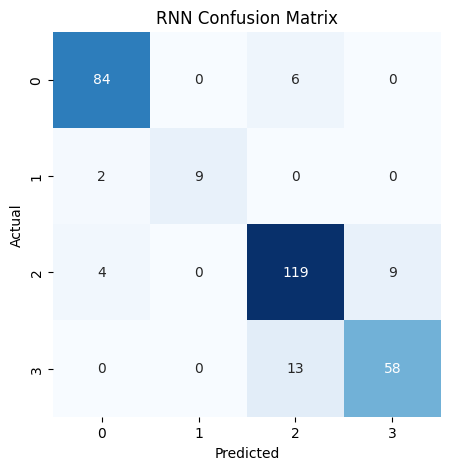

In [265]:
# Recurrent Neural Networks (RNNs) - Simple MLP
rnn_clf = MLPClassifier(random_state=42)
rnn_clf.fit(X_train, y_train)
rnn_pred = rnn_clf.predict(X_test)
rnn_accuracy = accuracy_score(y_test, rnn_pred)
rnn_report = classification_report(y_test, rnn_pred)
rnn_cm = confusion_matrix(y_test, rnn_pred)

print("Recurrent Neural Networks (RNNs) Results:")
print(f"Accuracy: {rnn_accuracy}")
print("Classification Report:")
print(rnn_report)


# Plot Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **All Algorithm Comparision**

In [152]:
pip install plotly


In [267]:
# List of classifier names and their accuracies
classifier_names = ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'MLP', 'RNN']
accuracies = [ rf_accuracy, gb_accuracy, adaboost_accuracy, mlp_accuracy, rnn_accuracy]


In [268]:
import plotly.express as px

# Create a DataFrame for accuracies
df_accuracies = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

# Plot the accuracies using Plotly
fig = px.bar(df_accuracies, x='Classifier', y='Accuracy', color='Accuracy',
             labels={'Accuracy': 'Accuracy Score'},
             title='Classifier Accuracy Comparison')

# Add text annotations to the top of each bar
for i, acc in enumerate(accuracies):
    fig.add_annotation(x=classifier_names[i], y=acc, text=f'{acc:.2f}', showarrow=False, yshift=10)

# Show the figure
fig.show()


# **User Input Prediction**

In [161]:
# Manually input scores for a new data point

# 0:Not at all, 1:Several days, 2:More than half the days, 3: Nearly every day

new_data_point = {
    '5.Feeling nervous, anxious or on edge': 2,  # Replace with a numeric score (0 to 3)
    '6.Not being able to stop or control worrying': 1,  # Replace with a numeric score (0 to 3)
    '7.Worrying too much about different things': 3,  # Replace with a numeric score (0 to 3)
    '8.Trouble relaxing': 2,  # Replace with a numeric score (0 to 3)
    '9.Being so restless that it is hard to sit still': 1,  # Replace with a numeric score (0 to 3)
    '10.Becoming easily annoyed or irritable': 0,  # Replace with a numeric score (0 to 3)
    '11.Feeling afraid as if something awful might happen': 3,  # Replace with a numeric score (0 to 3)

}
# Calculate GAD7_Total_Score
new_data_point['GAD7_Total_Score'] = sum(new_data_point.values())

# Convert the new data point to a DataFrame
new_data_df = pd.DataFrame([new_data_point])


In [162]:
# Use the trained models to predict anxiety level for the new data point

rf_pred = rf.predict(new_data_df)
gb_pred = gb.predict(new_data_df)
adaboost_pred = adaboost.predict(new_data_df)
mlp_pred = mlp.predict(new_data_df)
rnn_pred = rnn_clf.predict(new_data_df)

In [163]:
# Print the predicted anxiety level for each algorithm

print(f'Random Forest Prediction: {rf_pred[0]}')
print(f'Gradient Boosting Prediction: {gb_pred[0]}')
print(f'AdaBoost Prediction: {adaboost_pred[0]}')
print(f'MLP Prediction: {mlp_pred[0]}')
print(f'RNN Prediction: {rnn_pred[0]}')


Random Forest Prediction: Moderate Anxiety
Gradient Boosting Prediction: Moderate Anxiety
AdaBoost Prediction: Moderate Anxiety
MLP Prediction: Moderate Anxiety
RNN Prediction: Moderate Anxiety


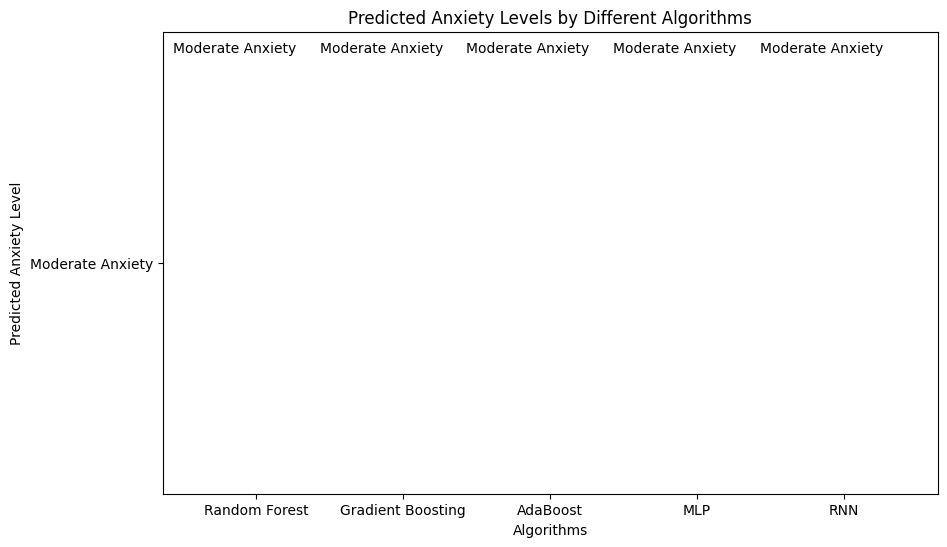

In [165]:
# Predicted anxiety levels
predictions = [rf_pred[0], gb_pred[0], adaboost_pred[0], mlp_pred[0],rnn_pred[0]]

# Algorithms names
algorithms = [ 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'MLP','RNN']

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, predictions, color=['blue', 'green', 'orange', 'red', 'purple','red'])

# Add labels on the left side of the bars
for bar, prediction in zip(bars, predictions):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.15, bar.get_height() + 0.05, prediction, ha='center', color='black')

plt.title('Predicted Anxiety Levels by Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Predicted Anxiety Level')
plt.show()